In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 500)

In [2]:
df = pd.read_excel("miuul_gezinomi.xlsx")
df.head()

,SaleId,SaleDate,CheckInDate,Price,ConceptName,SaleCityName,CInDay,SaleCheckInDayDiff,Seasons
0,415122,2022-12-03,2022-12-03,79.304029,Herşey Dahil,Antalya,Saturday,0,Low
1,415103,2022-12-03,2022-12-03,45.970696,Yarım Pansiyon,Antalya,Saturday,0,Low
2,404034,2022-09-12,2022-09-13,77.838828,Herşey Dahil,Antalya,Tuesday,1,High
3,415094,2022-12-03,2022-12-10,222.710623,Yarım Pansiyon,İzmir,Saturday,7,Low
4,414951,2022-12-01,2022-12-03,140.476190,Yarım Pansiyon,İzmir,Saturday,2,Low


In [3]:
def check_df(dataframe, head=5):
    print("shape:",dataframe.shape)
    print("types:\n",dataframe.dtypes)
    print("Head:\n", dataframe.head())
    print("about null:\n",dataframe.isnull().sum())
    print("descibe:\n",dataframe.describe())

In [4]:
check_df(df)

shape: (59164, 9)
types:
 SaleId                         int64
SaleDate              datetime64[ns]
CheckInDate           datetime64[ns]
Price                        float64
ConceptName                   object
SaleCityName                  object
CInDay                        object
SaleCheckInDayDiff             int64
Seasons                       object
dtype: object
Head:
    SaleId   SaleDate CheckInDate       Price     ConceptName SaleCityName    CInDay  SaleCheckInDayDiff Seasons
0  415122 2022-12-03  2022-12-03   79.304029    Herşey Dahil      Antalya  Saturday                   0     Low
1  415103 2022-12-03  2022-12-03   45.970696  Yarım Pansiyon      Antalya  Saturday                   0     Low
2  404034 2022-09-12  2022-09-13   77.838828    Herşey Dahil      Antalya   Tuesday                   1    High
3  415094 2022-12-03  2022-12-10  222.710623  Yarım Pansiyon        İzmir  Saturday                   7     Low
4  414951 2022-12-01  2022-12-03  140.476190  Yarım Pansiyon

In [5]:
df["SaleCityName"].unique()

array(['Antalya', 'İzmir', 'Diğer', 'Aydın', 'Muğla', 'Girne'],
      dtype=object)

In [6]:
df["SaleCityName"].value_counts()

SaleCityName
Antalya    31649
Muğla      10662
Aydın      10646
Diğer       3245
İzmir       2507
Girne        455
Name: count, dtype: int64

In [7]:
df["ConceptName"].value_counts()

ConceptName
Herşey Dahil      53186
Yarım Pansiyon     3559
Oda + Kahvaltı     2419
Name: count, dtype: int64

In [8]:
df.groupby("SaleCityName")["Price"].sum()


SaleCityName
Antalya    2.041911e+06
Aydın      5.732960e+05
Diğer      1.545723e+05
Girne      2.706503e+04
Muğla      6.658422e+05
İzmir      1.659348e+05
Name: Price, dtype: float64

In [9]:
df.groupby("ConceptName")["Price"].sum()

ConceptName
Herşey Dahil      3.332911e+06
Oda + Kahvaltı    1.213084e+05
Yarım Pansiyon    1.744024e+05
Name: Price, dtype: float64

In [10]:
df.groupby("SaleCityName")["Price"].mean()

SaleCityName
Antalya    64.521474
Aydın      53.855896
Diğer      47.707497
Girne      59.483579
Muğla      62.461746
İzmir      66.267905
Name: Price, dtype: float64

In [11]:
df.groupby("ConceptName")["Price"].mean()

ConceptName
Herşey Dahil      62.672260
Oda + Kahvaltı    50.252010
Yarım Pansiyon    49.030742
Name: Price, dtype: float64

In [12]:
df.groupby( by = ["SaleCityName","ConceptName"])["Price"].mean()

SaleCityName  ConceptName   
Antalya       Herşey Dahil      64.519028
              Oda + Kahvaltı    63.504816
              Yarım Pansiyon    67.190613
Aydın         Herşey Dahil      53.995467
              Oda + Kahvaltı    34.458787
              Yarım Pansiyon    30.016543
Diğer         Herşey Dahil      84.771093
              Oda + Kahvaltı    37.599082
              Yarım Pansiyon    42.113440
Girne         Herşey Dahil      97.680970
              Oda + Kahvaltı    39.775536
              Yarım Pansiyon    53.247838
Muğla         Herşey Dahil      63.020053
              Oda + Kahvaltı    59.037763
              Yarım Pansiyon    45.120924
İzmir         Herşey Dahil      74.701519
              Oda + Kahvaltı    41.320342
              Yarım Pansiyon    59.610053
Name: Price, dtype: float64

In [13]:
df.head()

,SaleId,SaleDate,CheckInDate,Price,ConceptName,SaleCityName,CInDay,SaleCheckInDayDiff,Seasons
0,415122,2022-12-03,2022-12-03,79.304029,Herşey Dahil,Antalya,Saturday,0,Low
1,415103,2022-12-03,2022-12-03,45.970696,Yarım Pansiyon,Antalya,Saturday,0,Low
2,404034,2022-09-12,2022-09-13,77.838828,Herşey Dahil,Antalya,Tuesday,1,High
3,415094,2022-12-03,2022-12-10,222.710623,Yarım Pansiyon,İzmir,Saturday,7,Low
4,414951,2022-12-01,2022-12-03,140.476190,Yarım Pansiyon,İzmir,Saturday,2,Low


In [14]:
df["SaleCheckInDayDiff"].describe()

count    59164.000000
mean        31.840173
std         51.493509
min          0.000000
25%          2.000000
50%         10.000000
75%         34.000000
max        630.000000
Name: SaleCheckInDayDiff, dtype: float64

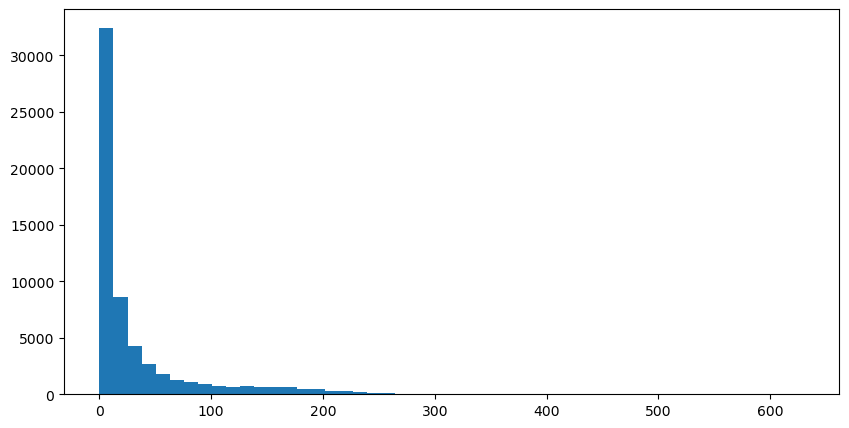

In [15]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10, 5))

#plt.boxplot("SaleCheckInDayDiff", data=df)
plt.hist("SaleCheckInDayDiff", bins=50 ,data=df)
plt.show()

In [16]:
araliklar = [-1,7,30,90,631] #df["SaleCheckInDayDiff"].max()
df["EB_Score"] = pd.cut(df["SaleCheckInDayDiff"], bins = araliklar, labels = ["Last_Minuters","Potantial_Planners","Planners","Early_Bookers"])
df["EB_Score"]

0        Last_Minuters
1        Last_Minuters
2        Last_Minuters
3        Last_Minuters
4        Last_Minuters
             ...      
59159    Early_Bookers
59160    Early_Bookers
59161    Last_Minuters
59162    Last_Minuters
59163    Early_Bookers
Name: EB_Score, Length: 59164, dtype: category
Categories (4, object): ['Last_Minuters' < 'Potantial_Planners' < 'Planners' < 'Early_Bookers']

In [17]:
df.groupby(["SaleCityName", "ConceptName", "EB_Score"]).agg({"Price": ["mean","count"]})

Price       
                                                     mean  count
SaleCityName ConceptName    EB_Score                            
Antalya      Herşey Dahil   Last_Minuters       62.752916  14148
                            Potantial_Planners  64.903700   8874
                            Planners            67.879960   4490
                            Early_Bookers       66.494885   3281
             Oda + Kahvaltı Last_Minuters       65.353740    503
...                                                   ...    ...
İzmir        Oda + Kahvaltı Early_Bookers       66.928111      3
             Yarım Pansiyon Last_Minuters       57.788126    636
                            Potantial_Planners  64.804043    198
                            Planners            60.507887     47
                            Early_Bookers       65.905583     14

[72 rows x 2 columns]

In [18]:
agg_df = df.groupby(["SaleCityName", "ConceptName", "Seasons"]).agg({"Price": "mean"}).sort_values(by="Price" , ascending=False)
agg_df

Price
SaleCityName ConceptName    Seasons            
Girne        Herşey Dahil   High     103.935448
                            Low       90.935944
İzmir        Yarım Pansiyon High      87.657303
Diğer        Herşey Dahil   Low       87.310882
                            High      83.787273
İzmir        Herşey Dahil   High      74.748363
                            Low       74.308287
Antalya      Yarım Pansiyon High      73.259029
             Oda + Kahvaltı High      66.267969
             Herşey Dahil   High      64.920065
Muğla        Herşey Dahil   High      63.384036
Antalya      Yarım Pansiyon Low       62.001678
             Herşey Dahil   Low       61.552427
Muğla        Oda + Kahvaltı High      61.264691
Antalya      Oda + Kahvaltı Low       60.666730
Girne        Yarım Pansiyon High      58.383668
İzmir        Yarım Pansiyon Low       55.350626
Aydın        Herşey Dahil   High      54.946560
İzmir        Oda + Kahvaltı High      54.141797
Girne        Yarım Pansiyon Low       48.578903
Muğla        Herşey Dahil   Low       48.304086
             Yarım Pansiyon High      45.823698
Aydın        Oda + Kahvaltı Low       44.451874
Diğer        Yarım Pansiyon Low       42.953978
Girne        Oda + Kahvaltı Low       40.043067
Diğer        Oda + Kahvaltı Low       39.959569
             Yarım Pansiyon High      39.731916
Girne        Oda + Kahvaltı High      39.479630
Muğla        Oda + Kahvaltı Low       37.774192
Diğer        Oda + Kahvaltı High      34.839543
Aydın        Herşey Dahil   Low       33.680699
İzmir        Oda + Kahvaltı Low       33.555235
Muğla        Yarım Pansiyon Low       32.681812
Aydın        Yarım Pansiyon High      32.626152
             Oda + Kahvaltı High      30.387530
             Yarım Pansiyon Low       25.271799

In [19]:
df.groupby(by=["SaleCityName", "ConceptName","CInDay"]).agg({"Price":["mean","count"]})

Price      
                                            mean count
SaleCityName ConceptName    CInDay                    
Antalya      Herşey Dahil   Friday     62.658940  4136
                            Monday     63.259143  6831
                            Saturday   64.415526  4741
                            Sunday     65.849177  3818
                            Thursday   62.892734  3898
...                                          ...   ...
İzmir        Yarım Pansiyon Saturday   52.504725   315
                            Sunday     98.934697    68
                            Thursday   52.484894    91
                            Tuesday    56.141381    73
                            Wednesday  54.064392    86

[126 rows x 2 columns]

In [20]:
agg_df = agg_df.reset_index()


In [21]:
agg_df["saleslevelbased"] = (agg_df["SaleCityName"] + "_" + agg_df["ConceptName"] + "_" + agg_df["Seasons"]).str.upper()
agg_df["saleslevelbased"]

0         GIRNE_HERŞEY DAHIL_HIGH
1          GIRNE_HERŞEY DAHIL_LOW
2       İZMIR_YARIM PANSIYON_HIGH
3          DIĞER_HERŞEY DAHIL_LOW
4         DIĞER_HERŞEY DAHIL_HIGH
5         İZMIR_HERŞEY DAHIL_HIGH
6          İZMIR_HERŞEY DAHIL_LOW
7     ANTALYA_YARIM PANSIYON_HIGH
8     ANTALYA_ODA + KAHVALTI_HIGH
9       ANTALYA_HERŞEY DAHIL_HIGH
10        MUĞLA_HERŞEY DAHIL_HIGH
11     ANTALYA_YARIM PANSIYON_LOW
12       ANTALYA_HERŞEY DAHIL_LOW
13      MUĞLA_ODA + KAHVALTI_HIGH
14     ANTALYA_ODA + KAHVALTI_LOW
15      GIRNE_YARIM PANSIYON_HIGH
16       İZMIR_YARIM PANSIYON_LOW
17        AYDIN_HERŞEY DAHIL_HIGH
18      İZMIR_ODA + KAHVALTI_HIGH
19       GIRNE_YARIM PANSIYON_LOW
20         MUĞLA_HERŞEY DAHIL_LOW
21      MUĞLA_YARIM PANSIYON_HIGH
22       AYDIN_ODA + KAHVALTI_LOW
23       DIĞER_YARIM PANSIYON_LOW
24       GIRNE_ODA + KAHVALTI_LOW
25       DIĞER_ODA + KAHVALTI_LOW
26      DIĞER_YARIM PANSIYON_HIGH
27      GIRNE_ODA + KAHVALTI_HIGH
28       MUĞLA_ODA + KAHVALTI_LOW
29      DIĞER_

In [22]:
agg_df

,SaleCityName,ConceptName,Seasons,Price,saleslevelbased
0,Girne,Herşey Dahil,High,103.935448,GIRNE_HERŞEY DAHIL_HIGH
1,Girne,Herşey Dahil,Low,90.935944,GIRNE_HERŞEY DAHIL_LOW
2,İzmir,Yarım Pansiyon,High,87.657303,İZMIR_YARIM PANSIYON_HIGH
3,Diğer,Herşey Dahil,Low,87.310882,DIĞER_HERŞEY DAHIL_LOW
4,Diğer,Herşey Dahil,High,83.787273,DIĞER_HERŞEY DAHIL_HIGH
5,İzmir,Herşey Dahil,High,74.748363,İZMIR_HERŞEY DAHIL_HIGH
6,İzmir,Herşey Dahil,Low,74.308287,İZMIR_HERŞEY DAHIL_LOW
7,Antalya,Yarım Pansiyon,High,73.259029,ANTALYA_YARIM PANSIYON_HIGH
8,Antalya,Oda + Kahvaltı,High,66.267969,ANTALYA_ODA + KAHVALTI_HIGH
9,Antalya,Herşey Dahil,High,64.920065,ANTALYA_HERŞEY DAHIL_HIGH


In [23]:
agg_df["segment"] = pd.qcut(agg_df["Price"], 4 , labels=["D","C","B","A"])
agg_df

,SaleCityName,ConceptName,Seasons,Price,saleslevelbased,segment
0,Girne,Herşey Dahil,High,103.935448,GIRNE_HERŞEY DAHIL_HIGH,A
1,Girne,Herşey Dahil,Low,90.935944,GIRNE_HERŞEY DAHIL_LOW,A
2,İzmir,Yarım Pansiyon,High,87.657303,İZMIR_YARIM PANSIYON_HIGH,A
3,Diğer,Herşey Dahil,Low,87.310882,DIĞER_HERŞEY DAHIL_LOW,A
4,Diğer,Herşey Dahil,High,83.787273,DIĞER_HERŞEY DAHIL_HIGH,A
5,İzmir,Herşey Dahil,High,74.748363,İZMIR_HERŞEY DAHIL_HIGH,A
6,İzmir,Herşey Dahil,Low,74.308287,İZMIR_HERŞEY DAHIL_LOW,A
7,Antalya,Yarım Pansiyon,High,73.259029,ANTALYA_YARIM PANSIYON_HIGH,A
8,Antalya,Oda + Kahvaltı,High,66.267969,ANTALYA_ODA + KAHVALTI_HIGH,A
9,Antalya,Herşey Dahil,High,64.920065,ANTALYA_HERŞEY DAHIL_HIGH,B


In [24]:
agg_df.groupby("segment").agg({"Price": ["mean","sum","max"]})

Price                        
              mean         sum         max
segment                                   
D        33.366288  300.296592   39.479630
C        44.887654  403.988887   54.141797
B        60.274498  542.470478   64.920065
A        82.467833  742.210498  103.935448

In [25]:
new_user = "ANTALYA_HERŞEY DAHIL_HIGH"
agg_df[agg_df["saleslevelbased"]==new_user]

,SaleCityName,ConceptName,Seasons,Price,saleslevelbased,segment
9,Antalya,Herşey Dahil,High,64.920065,ANTALYA_HERŞEY DAHIL_HIGH,B
